# Analyze dynamics and frequency spectra of filaments driven with a constant compressive tip follower-force

In [13]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import pandas as pd

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

In [36]:
# Load a constant compressive load file.
# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.0128205128205128_activityTime_750_simType_point/SimResults_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'
filament = analysis.analysisTools(file = file)

Attribute not found


In [37]:
# Frequency-spectrum of filament dynamics to extract the fundamental frequency
filament.compute_base_tip_angle()

start_index = int(filament.Nt/2)
end_index = int(filament.Nt)

time_array = filament.Time[start_index:end_index]
time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
time_series_data = time_series_data - np.mean(time_series_data)
N_signal = len(time_series_data)

In [38]:
### FFT of the base tip angle time-series data
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = filament.Nt/(max(filament.Time))

print('Time series sample rate: {}'.format(SAMPLE_RATE))
yf = rfft(time_series_data)
xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)

Time series sample rate: 0.05000266666666667


In [39]:
# Find the dominant frequency
clip_point = int(len(xf)/5)
idx = np.argmax(np.abs(yf))

freq_dom = np.abs(xf)[idx]
cycle_time = 1/freq_dom
print('Flapping freq: {} cycles/time'.format(freq_dom))
print('Flapping time: {}'.format(cycle_time))

Flapping freq: 0.00023465415244596128 cycles/time
Flapping time: 4261.590896970344


<IPython.core.display.Javascript object>


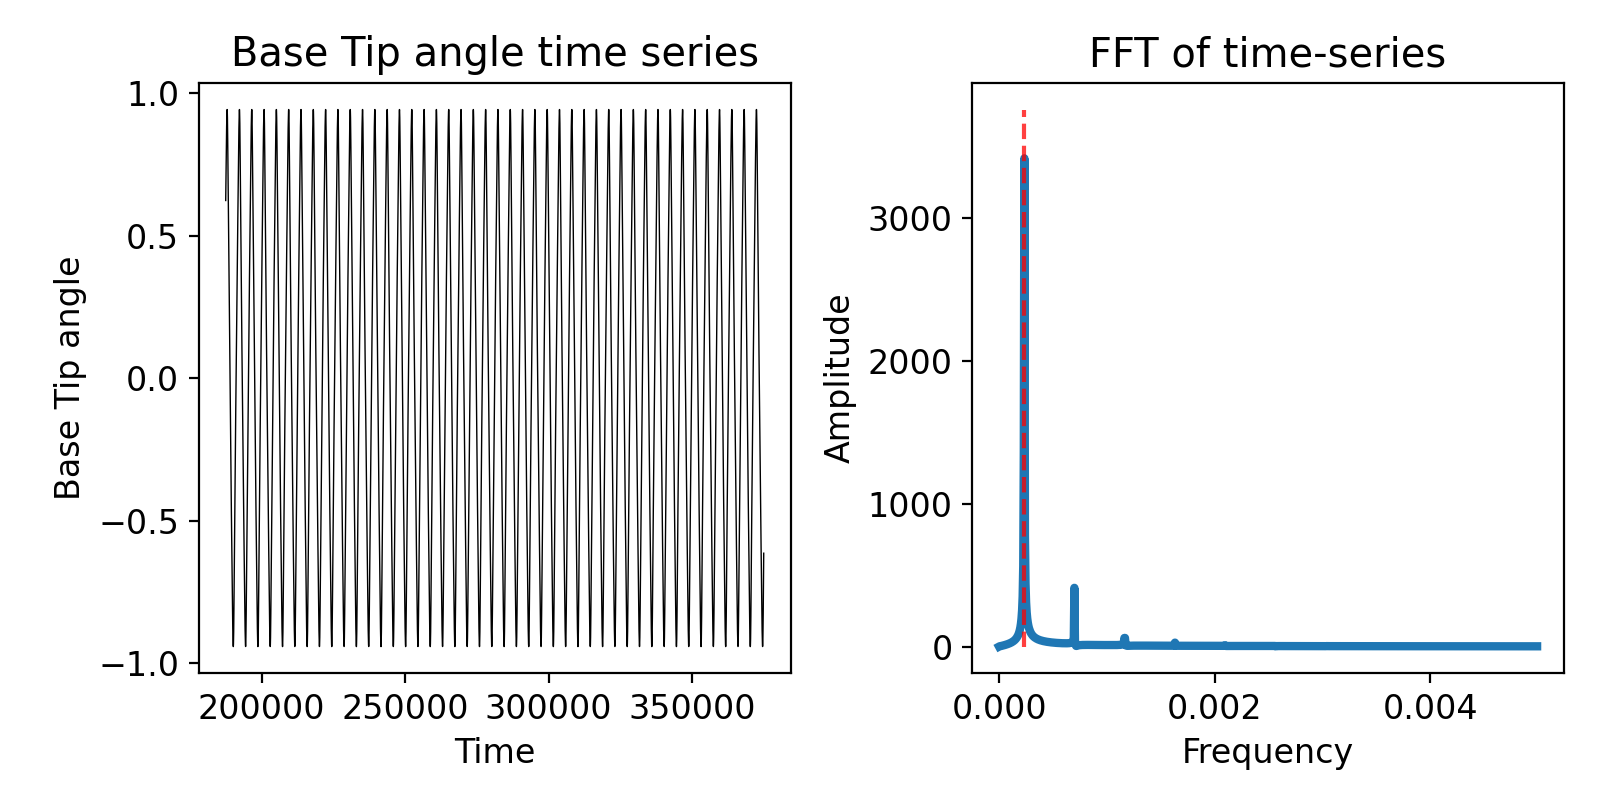

In [40]:
# Plot the time series and the FFT spectrum
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))


ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
ax0.set_xlabel('Time')
ax0.set_ylabel('Base Tip angle')
ax0.set_title('Base Tip angle time series')

ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
# Draw the forcing frequency
plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Amplitude')
ax1.set_title('FFT of time-series')
plt.tight_layout()

# Save the plot
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
# plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

plt.show()

In [41]:
from scipy.fft import rfft, rfftfreq

def compute_filament_freq(filament = None, plot = False):
    filament.compute_base_tip_angle()

    start_index = int(filament.Nt/2)
    end_index = int(filament.Nt)

    time_array = filament.Time[start_index:end_index]
    time_series_data = filament.derived_data['base tip angle'][start_index:end_index]
    time_series_data = time_series_data - np.mean(time_series_data)
    N_signal = len(time_series_data)
    
    ### FFT of the base tip angle time-series data

    SAMPLE_RATE = filament.Nt/(max(filament.Time))

    print('Time series sample rate: {}'.format(SAMPLE_RATE))
    yf = rfft(time_series_data)
    xf = rfftfreq(N_signal, 1 / SAMPLE_RATE)
    
    # Find the dominant frequency
    clip_point = int(len(xf)/5)
    idx = np.argmax(np.abs(yf))

    freq_dom = np.abs(xf)[idx]
    cycle_time = 1/freq_dom
    print('Flapping freq: {} cycles/time'.format(freq_dom))
    print('Flapping time: {}'.format(cycle_time))
    
    
    if plot:
        fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (8, 4))
        ax0.plot(time_array, time_series_data,color = 'k', linewidth = 0.5)
        ax0.set_xlabel('Time')
        ax0.set_ylabel('Base Tip angle')
        ax0.set_title('Base Tip angle time series')

        ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
        # Draw the forcing frequency
        plt.vlines(freq_dom, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
        ax1.set_xlabel('Frequency')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('FFT of time-series')
        plt.tight_layout()

        # Save the plot
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
        # plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

        plt.show()
        
    return freq_dom
        
    

Time series sample rate: 0.10001
Flapping freq: 0.0001399860027994401 cycles/time
Flapping time: 7143.571357149999


<IPython.core.display.Javascript object>


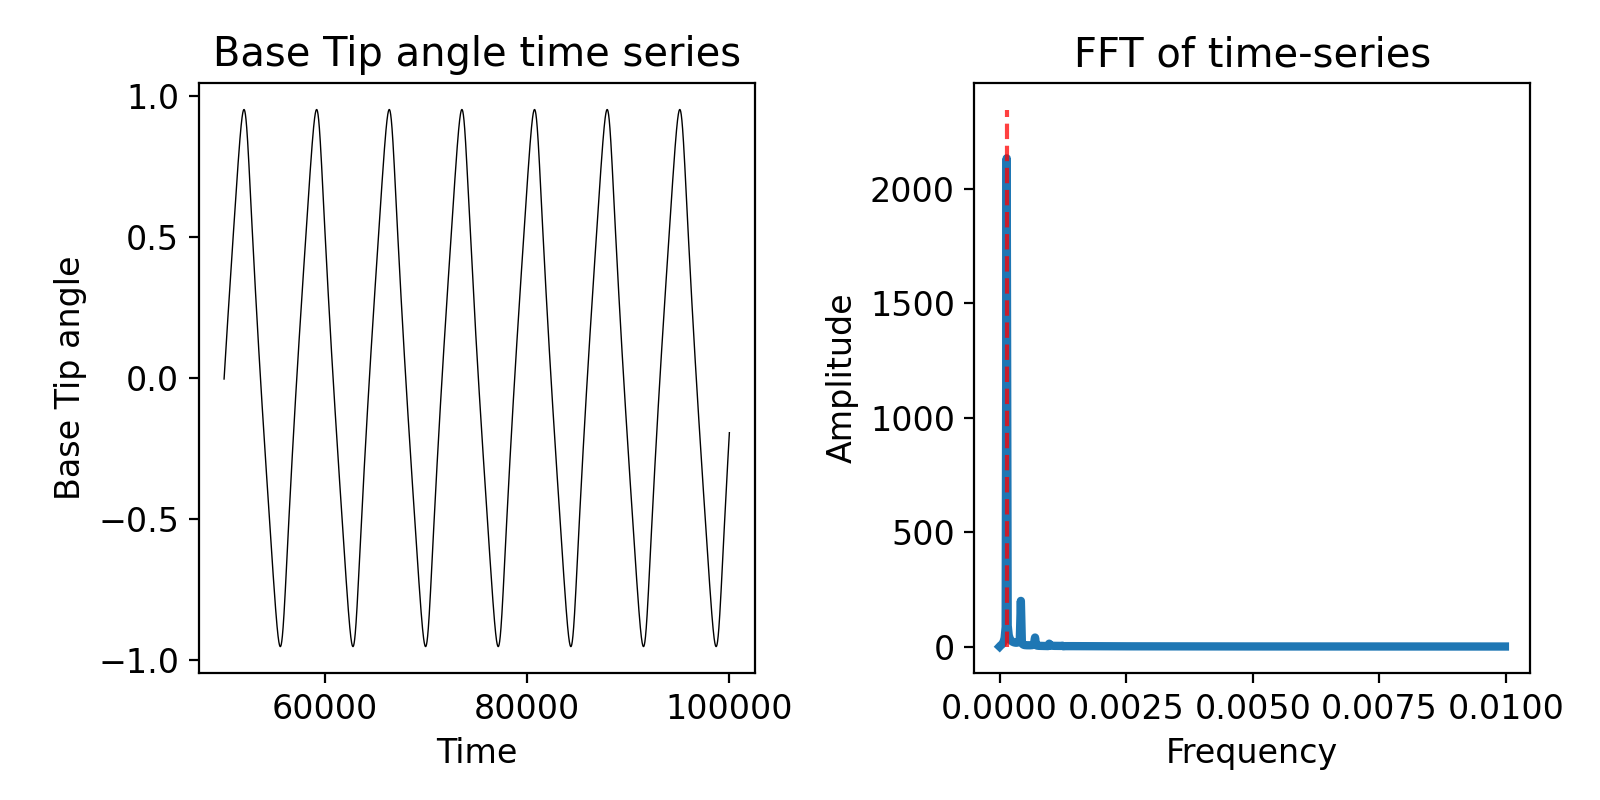

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.97
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00086
Activity number: 18.12749
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0002799720055988802 cycles/time
Flapping time: 3571.7856785749996


<IPython.core.display.Javascript object>


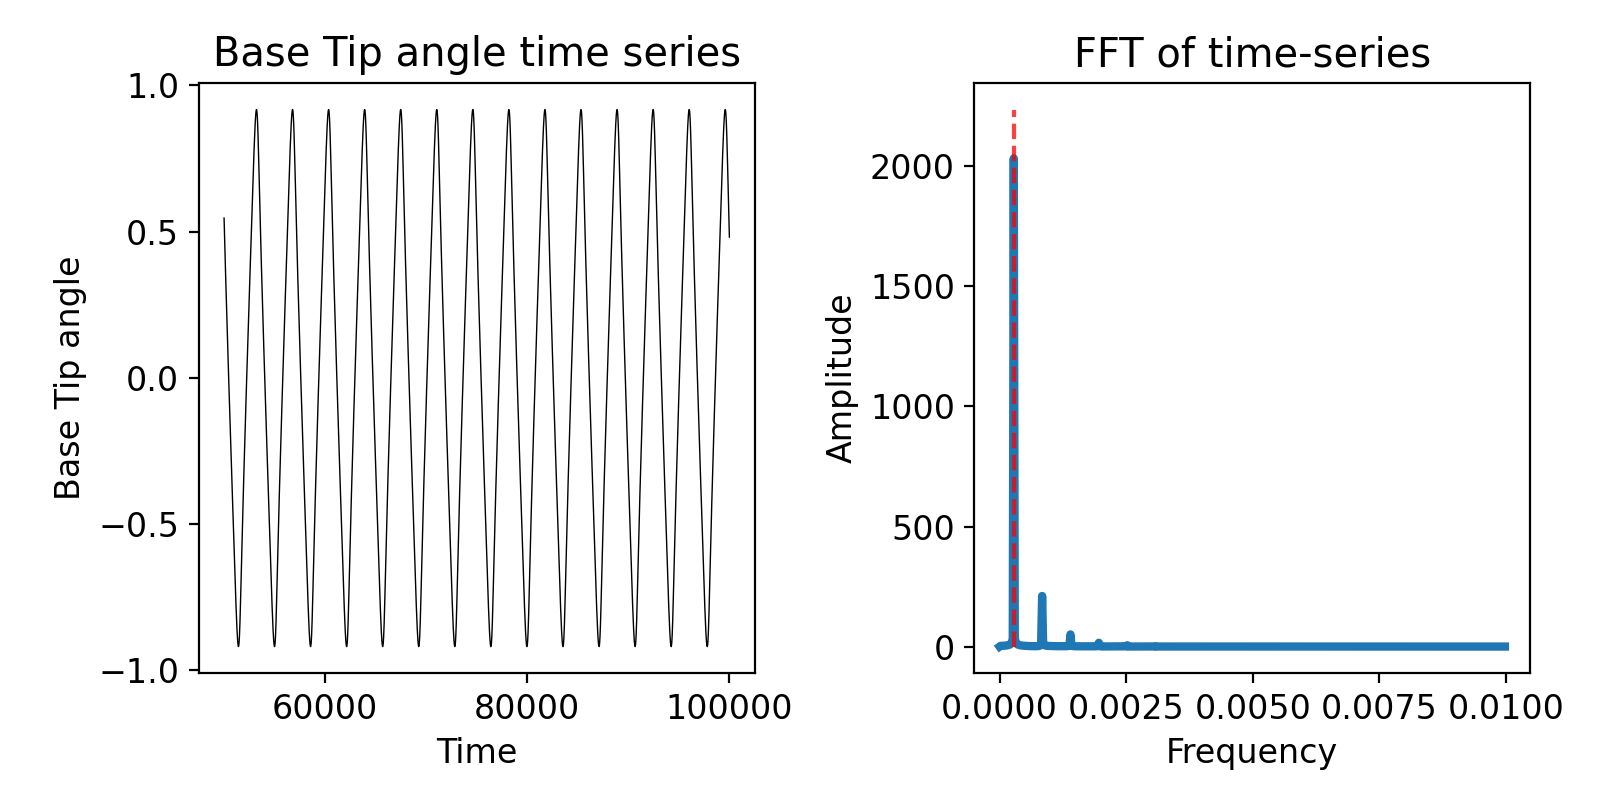

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.74
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00147
Activity number: 30.87339
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0004999500099980005 cycles/time
Flapping time: 2000.1999800019996


<IPython.core.display.Javascript object>


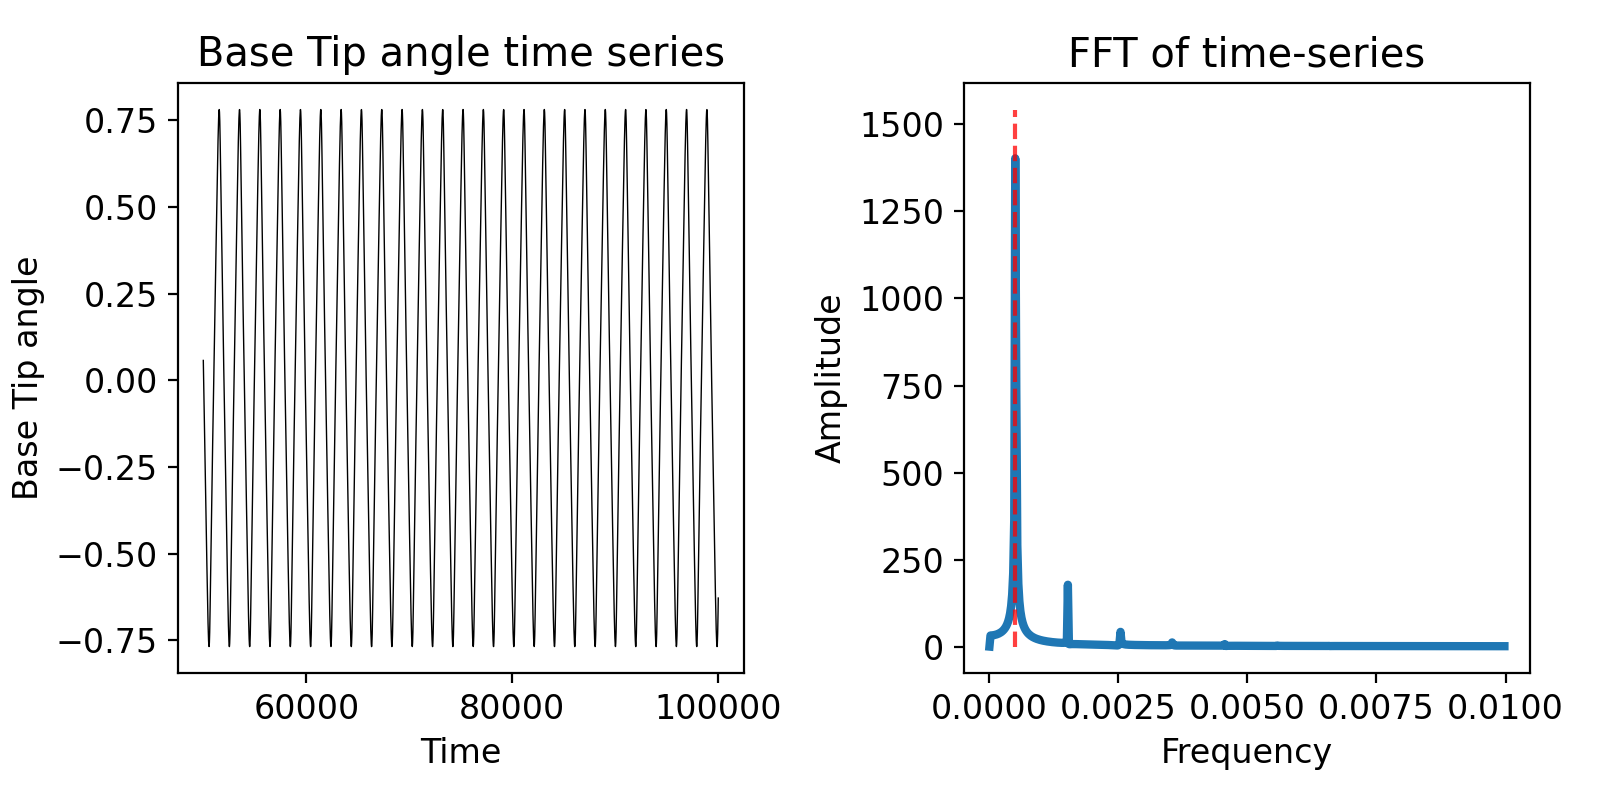

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.17
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.0022
Activity number: 46.16846
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0002199780043991202 cycles/time
Flapping time: 4545.9090454590905


<IPython.core.display.Javascript object>


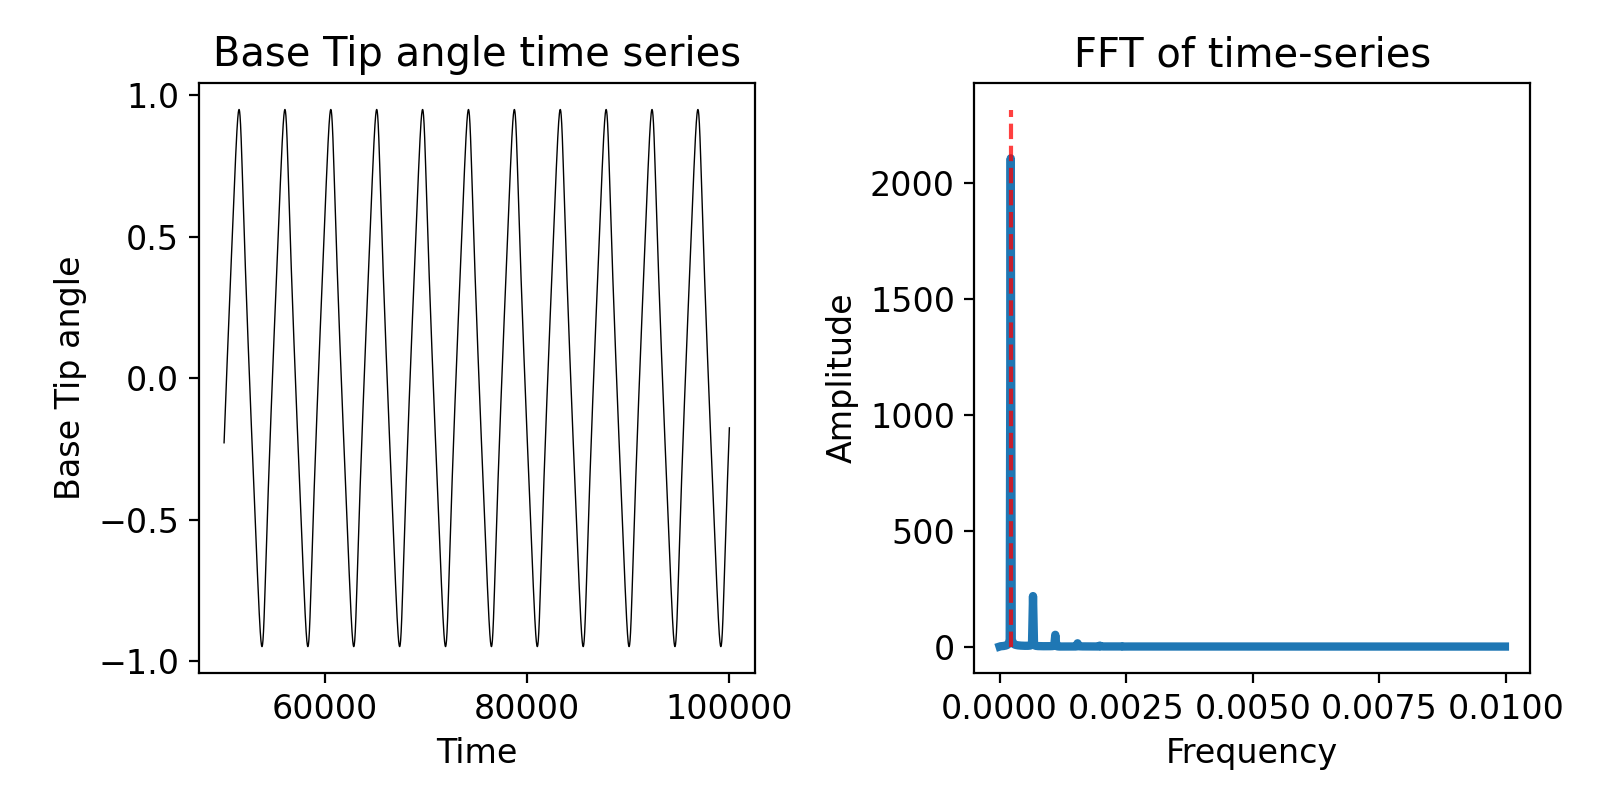

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.09
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00123
Activity number: 25.77503
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0006199380123975205 cycles/time
Flapping time: 1613.0645000016127


<IPython.core.display.Javascript object>


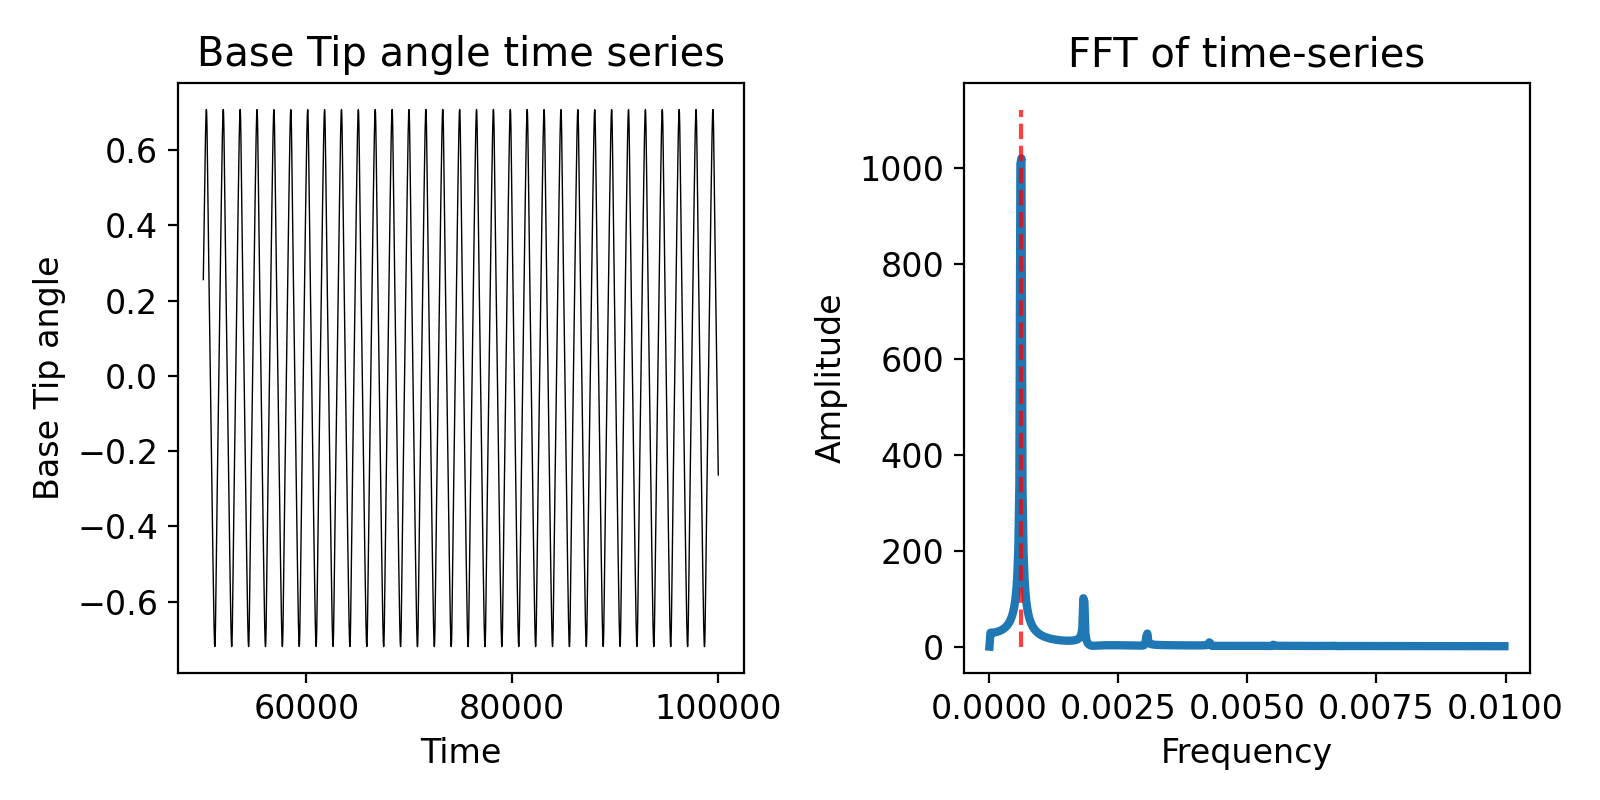

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.05
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00244
Activity number: 51.26682
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00015998400319936013 cycles/time
Flapping time: 6250.624937506249


<IPython.core.display.Javascript object>


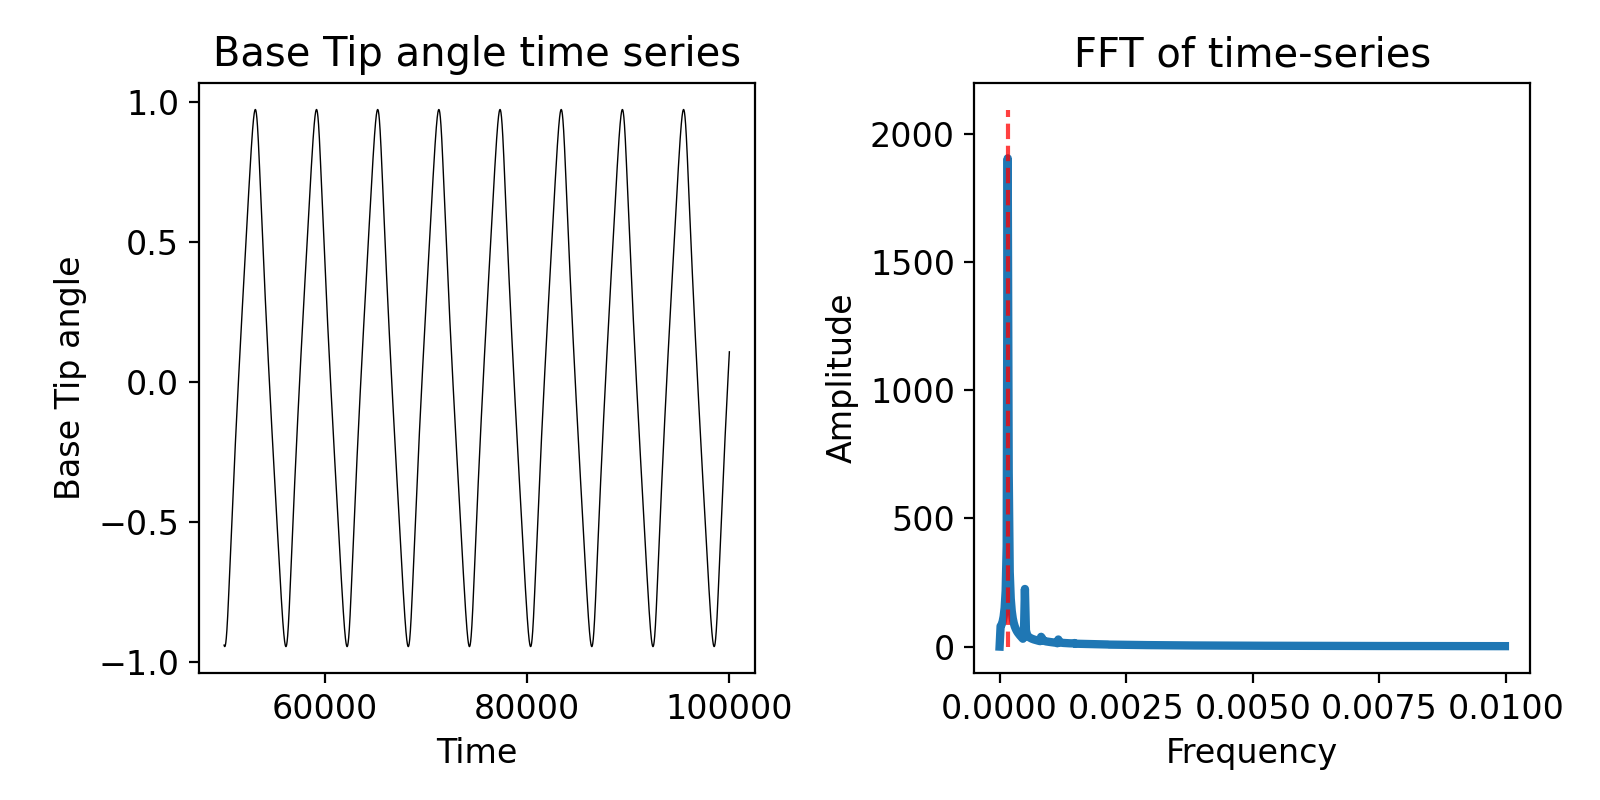

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.6
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00098
Activity number: 20.67667
**************************************************
Time series sample rate: 0.10001
Flapping freq: 3.9996000799840034e-05 cycles/time
Flapping time: 25002.499750024996


<IPython.core.display.Javascript object>


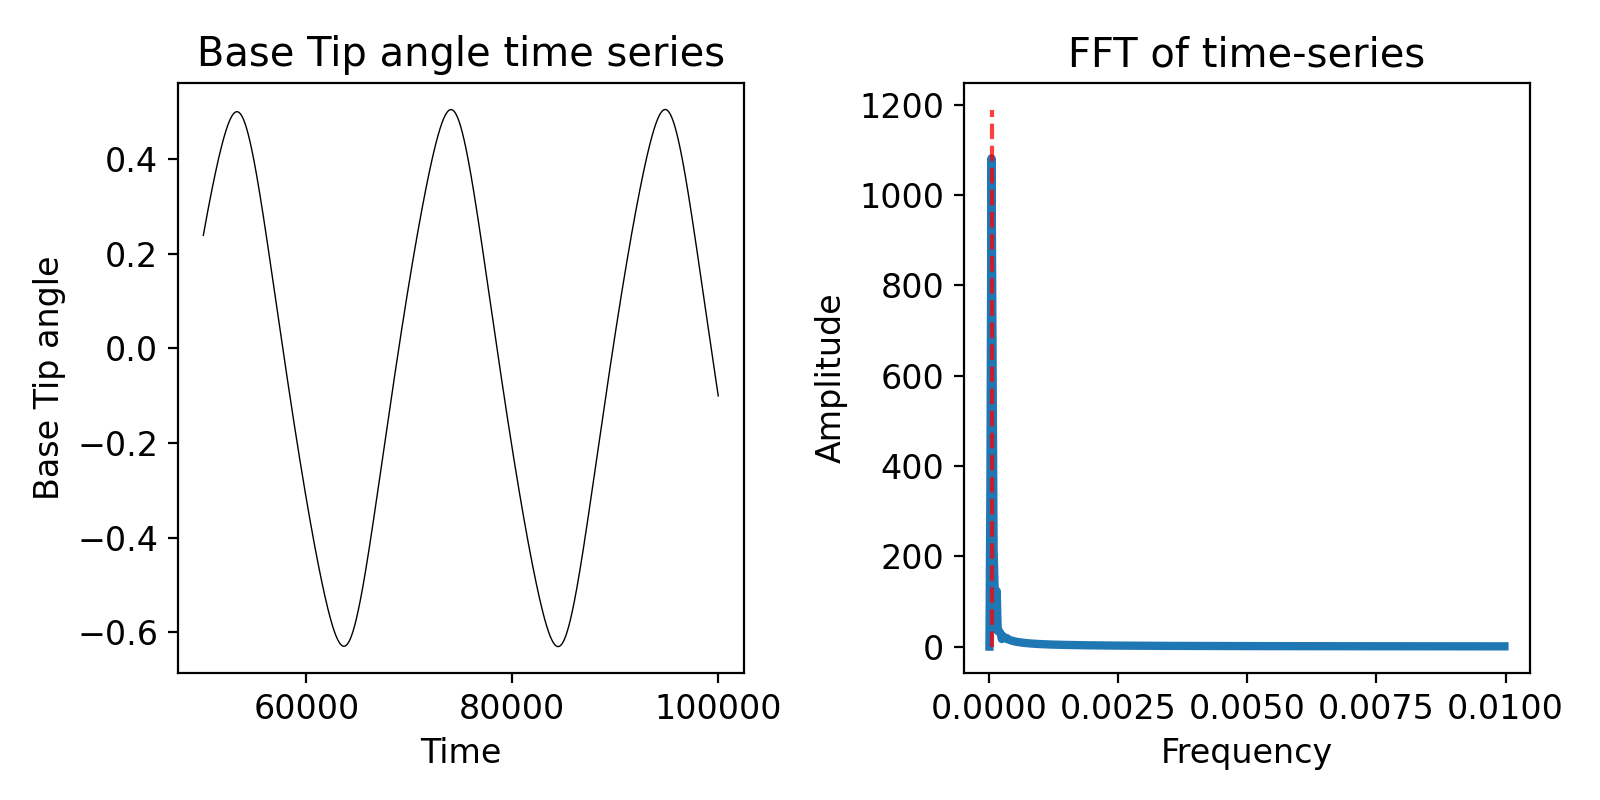

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 6.79
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00038
Activity number: 7.93078
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00031996800639872027 cycles/time
Flapping time: 3125.3124687531244


<IPython.core.display.Javascript object>


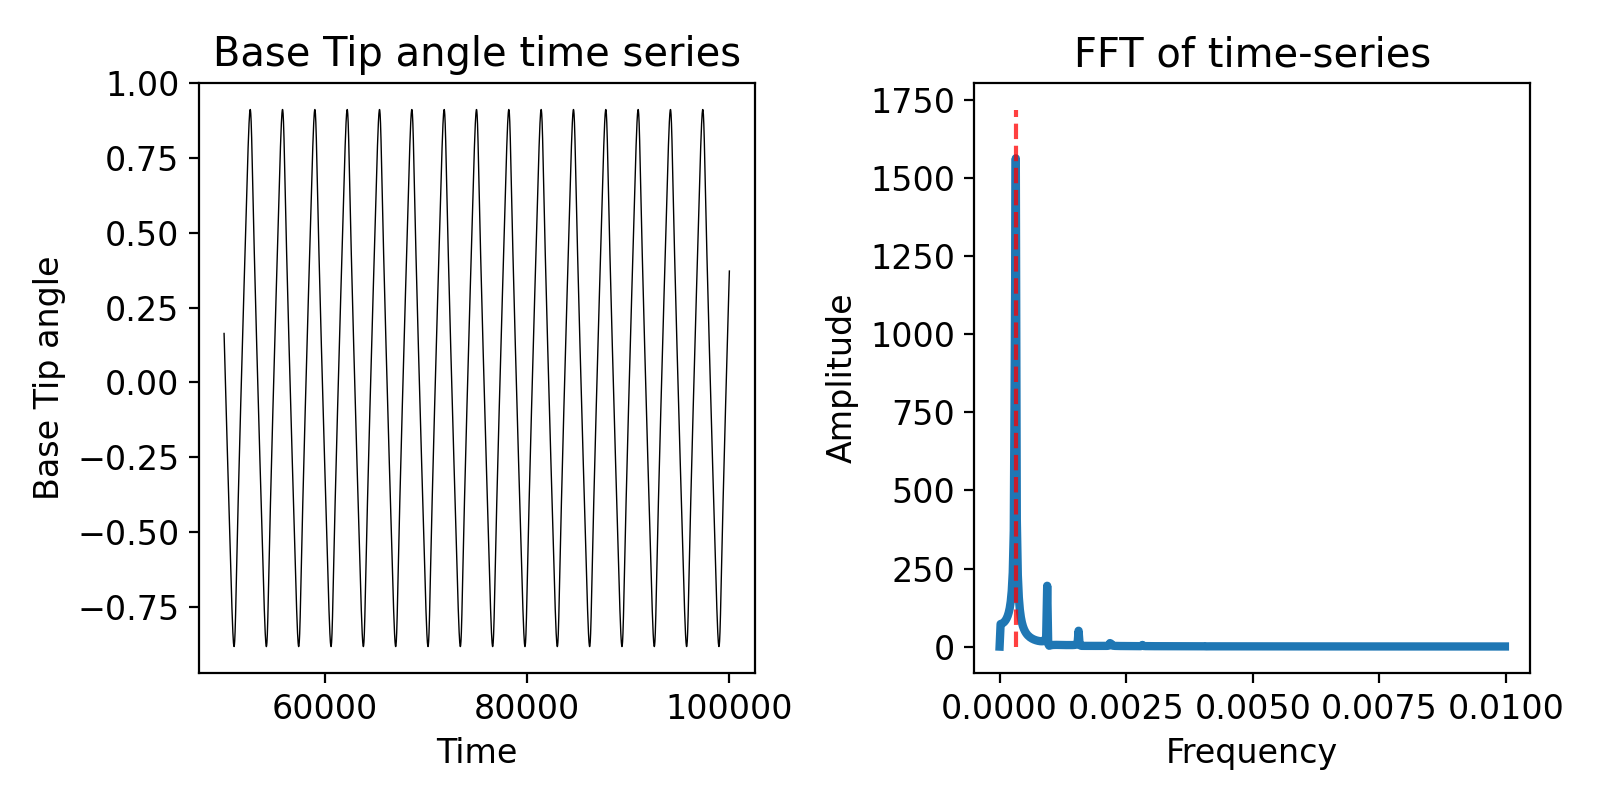

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.61
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00159
Activity number: 33.42257
**************************************************
Time series sample rate: 0.10001
Flapping freq: 7.999200159968007e-05 cycles/time
Flapping time: 12501.249875012498


<IPython.core.display.Javascript object>


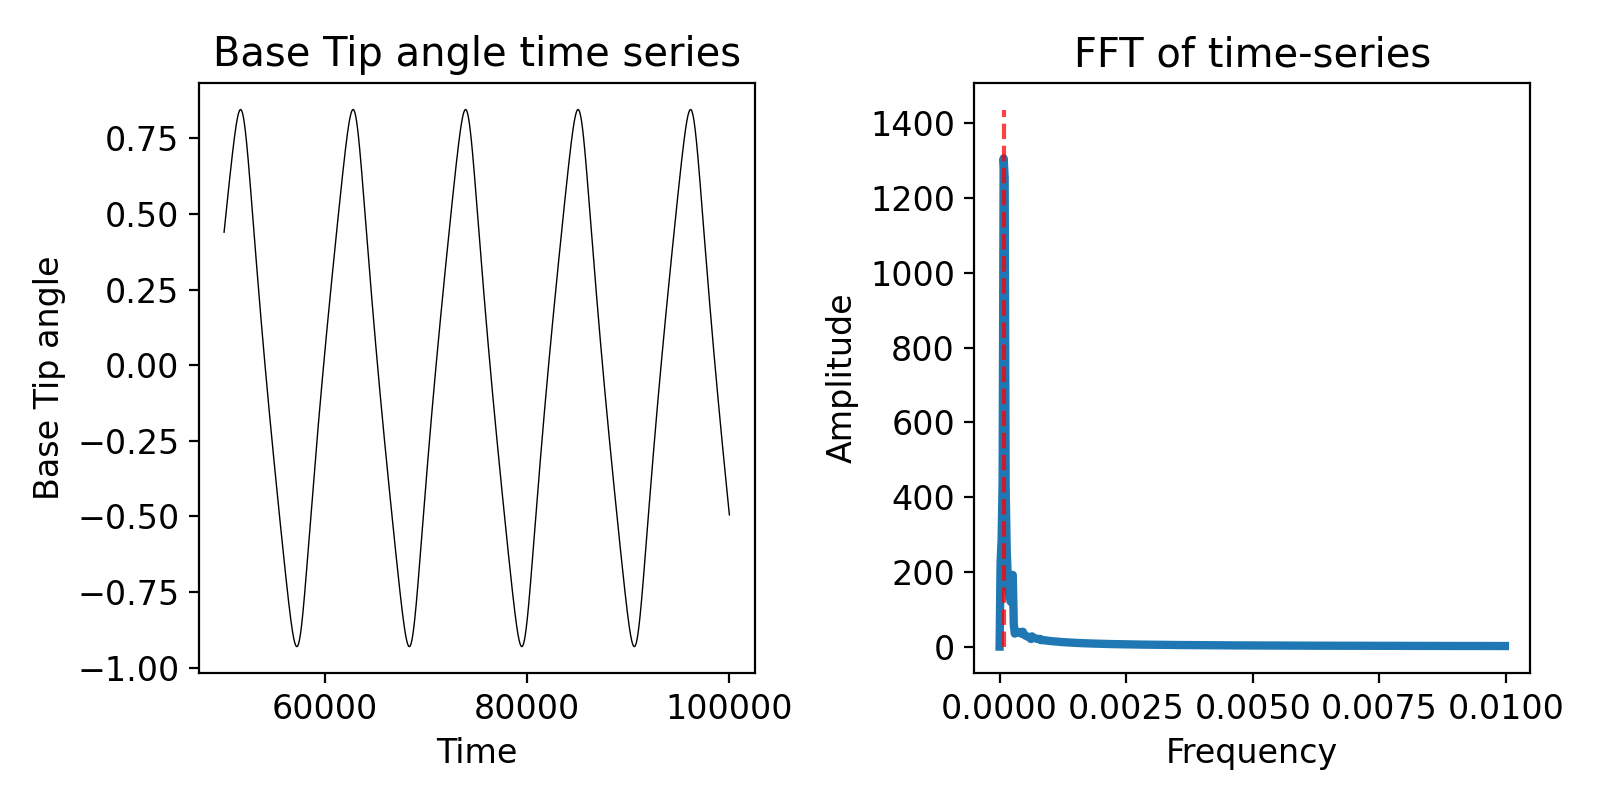

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 4.13
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00062
Activity number: 13.02914
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00019998000399920016 cycles/time
Flapping time: 5000.499950005


<IPython.core.display.Javascript object>


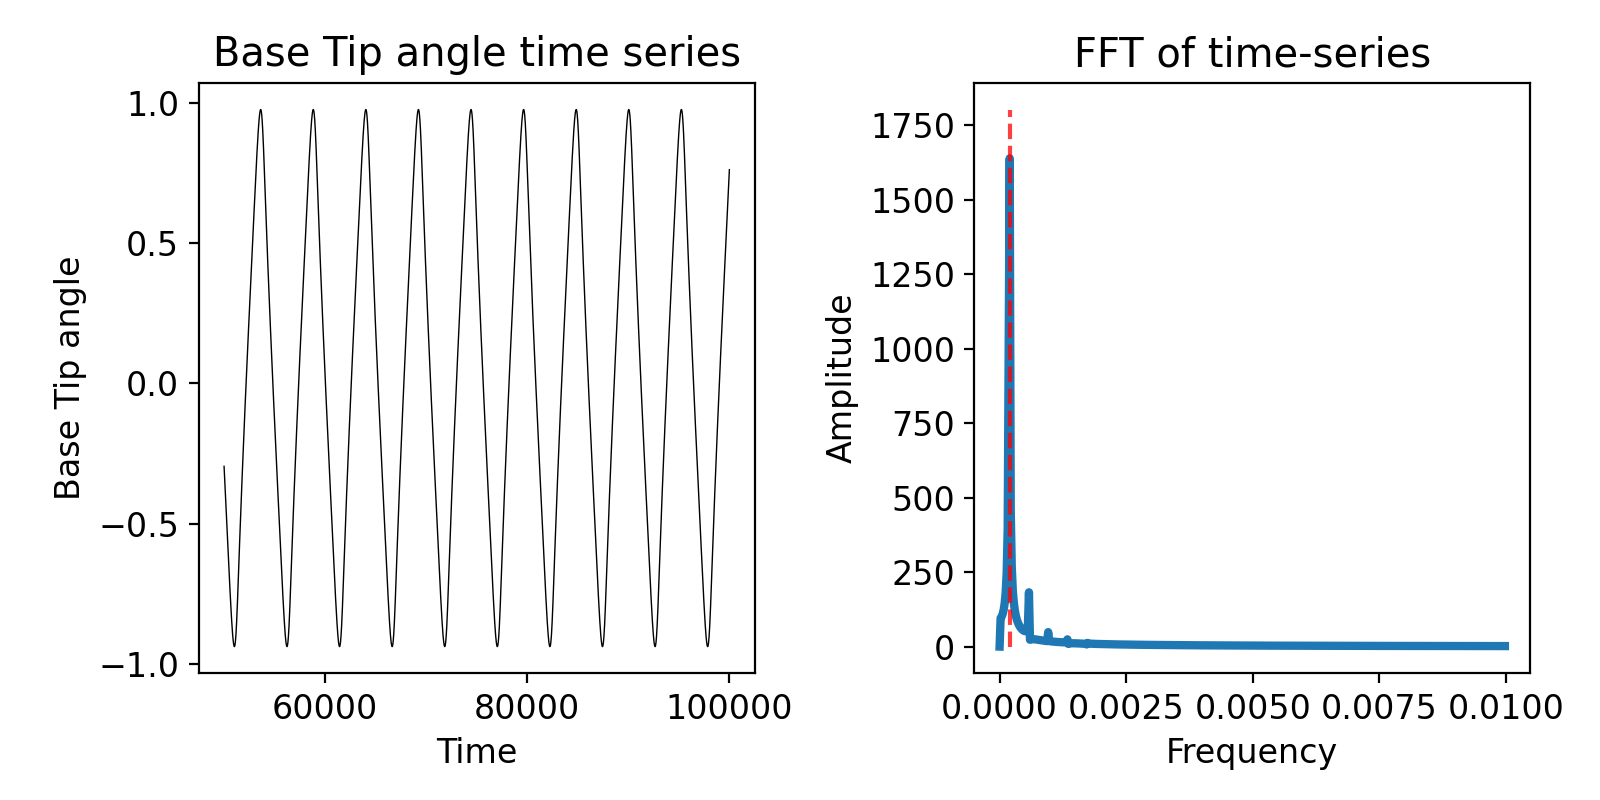

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 2.32
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.0011
Activity number: 23.22585
**************************************************
Time series sample rate: 0.10001
Flapping freq: 5.9994001199760054e-05 cycles/time
Flapping time: 16668.33316668333


<IPython.core.display.Javascript object>


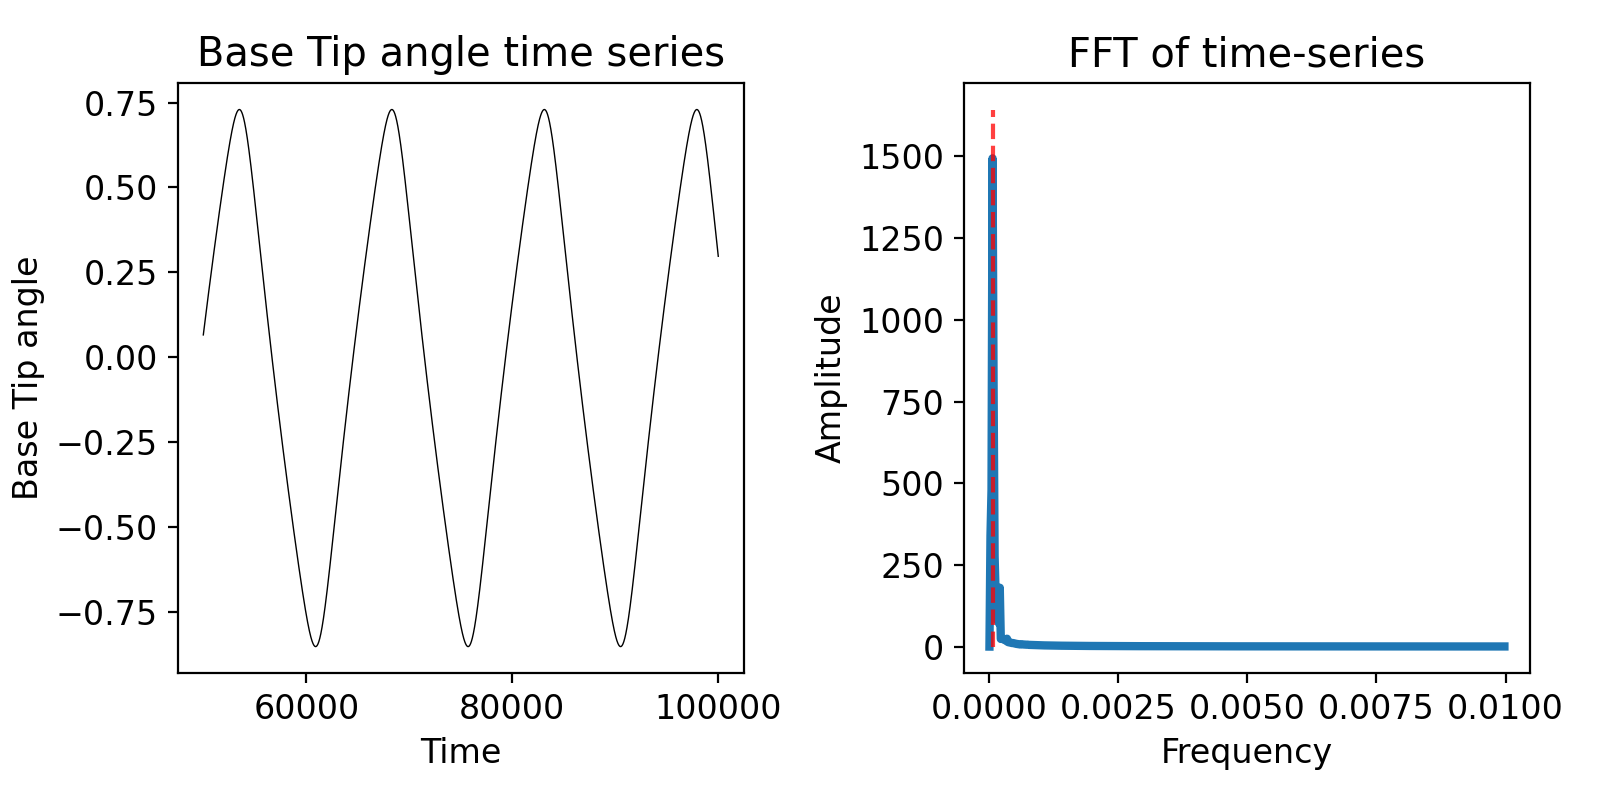

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 5.14
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.0005
Activity number: 10.47996
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0006799320135972806 cycles/time
Flapping time: 1470.735279413235


<IPython.core.display.Javascript object>

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.0
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00256
Activity number: 53.816
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00023997600479904021 cycles/time
Flapping time: 4167.083291670832


<IPython.core.display.Javascript object>

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.9
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00135
Activity number: 28.32421
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00011998800239952011 cycles/time
Flapping time: 8334.166583341665


<IPython.core.display.Javascript object>


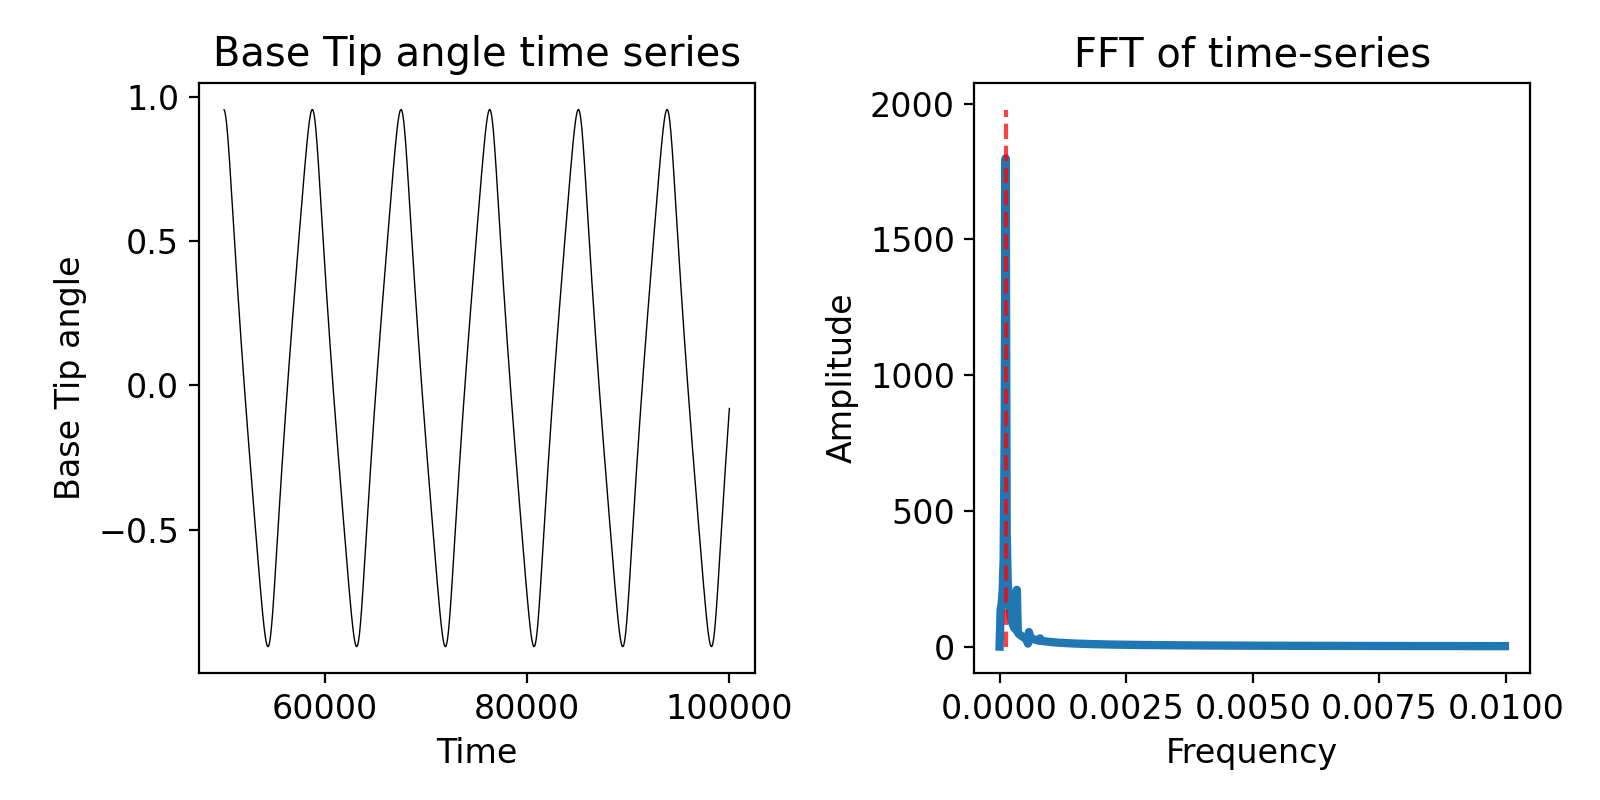

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 3.45
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00074
Activity number: 15.57832
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0005599440111977604 cycles/time
Flapping time: 1785.8928392874998


<IPython.core.display.Javascript object>


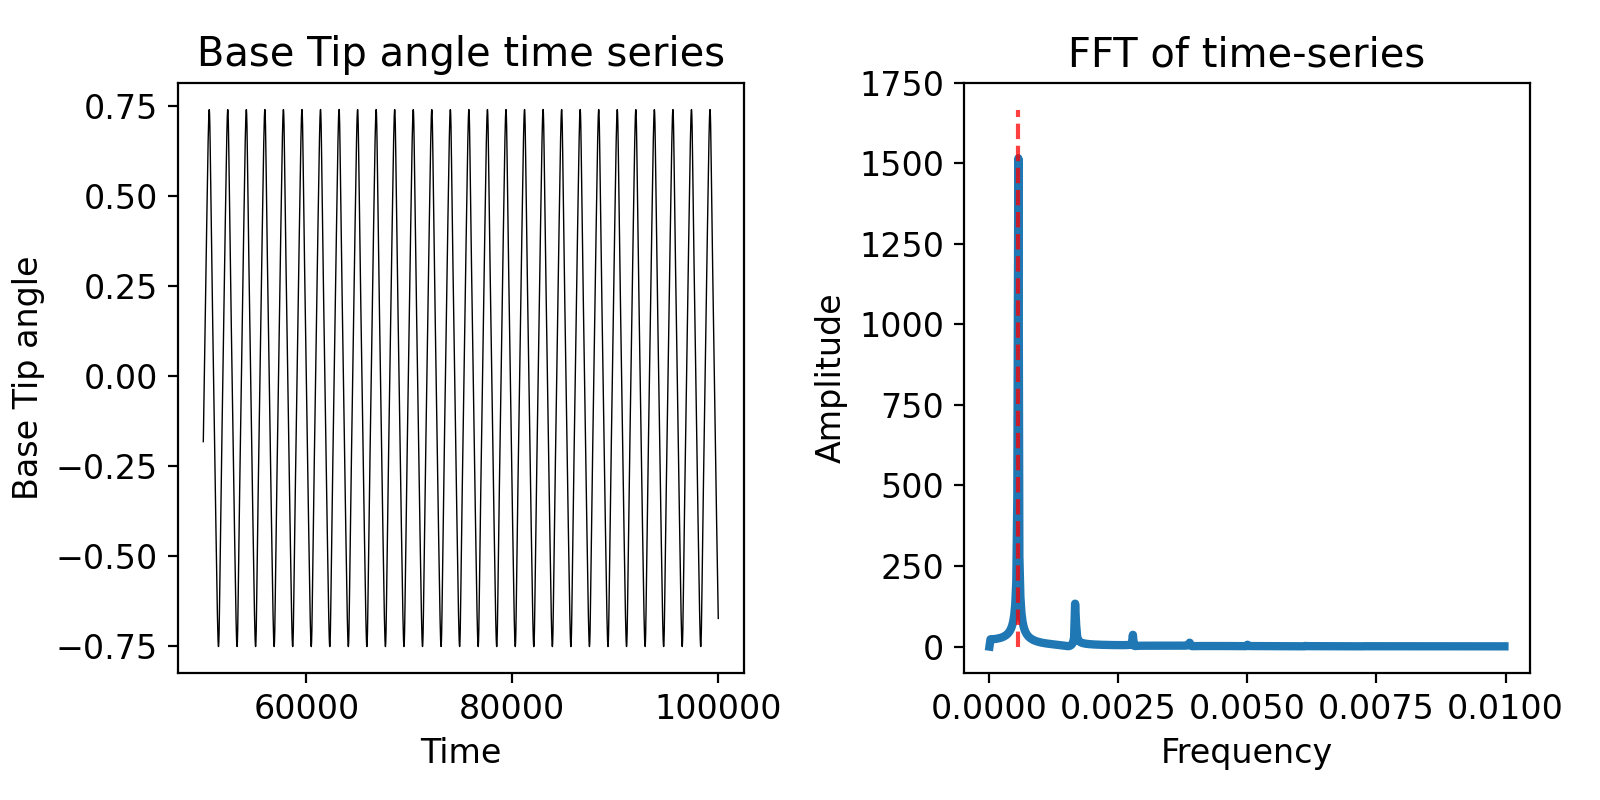

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.1
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00232
Activity number: 48.71764
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.00041995800839832035 cycles/time
Flapping time: 2381.190452383333


<IPython.core.display.Javascript object>


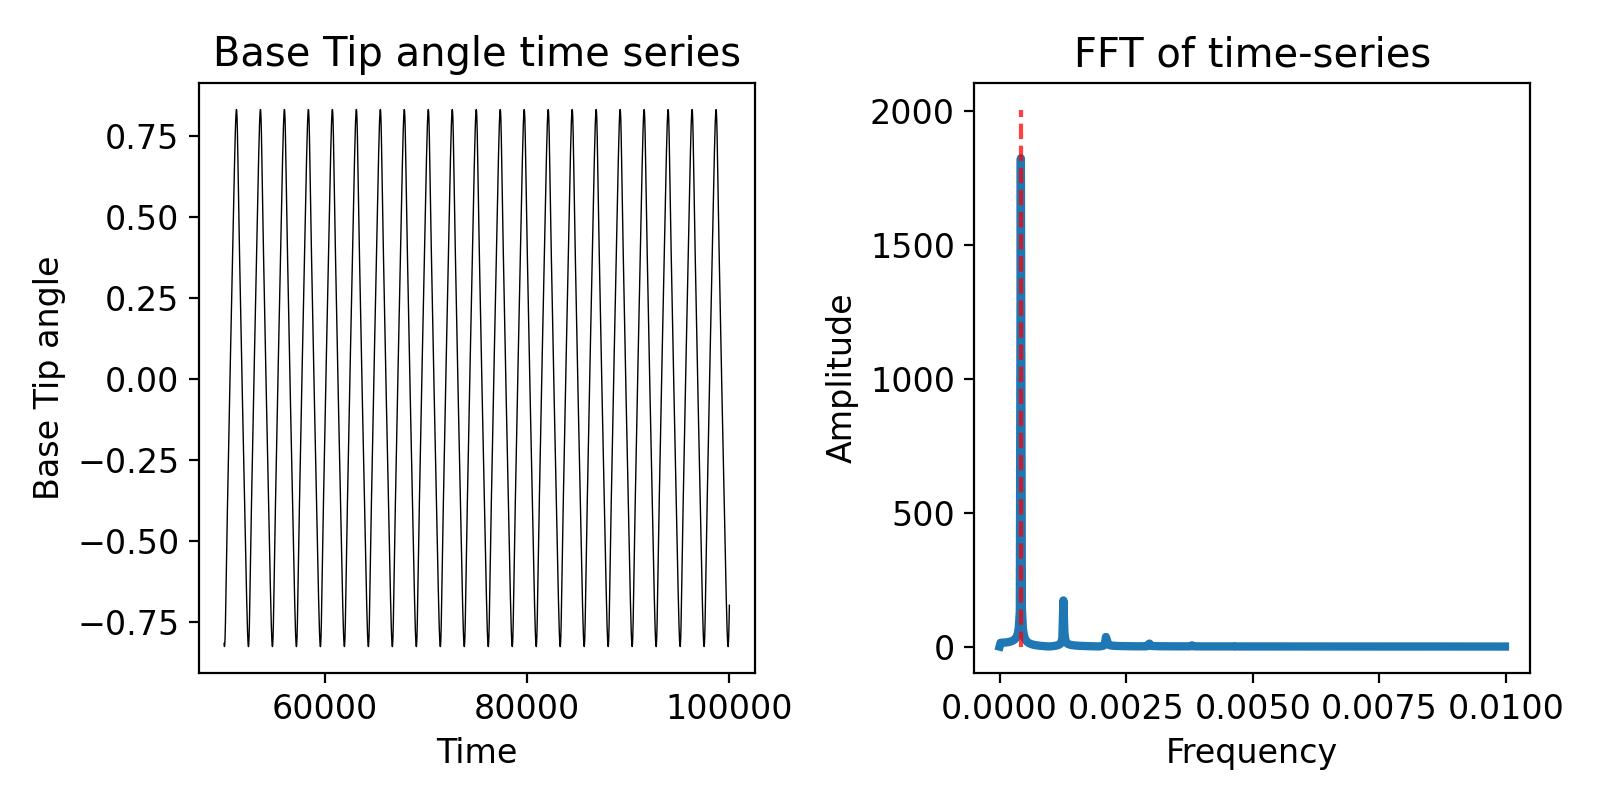

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.31
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00195
Activity number: 41.07011
**************************************************
Time series sample rate: 0.10001
Flapping freq: 3.9996000799840034e-05 cycles/time
Flapping time: 25002.499750024996


<IPython.core.display.Javascript object>


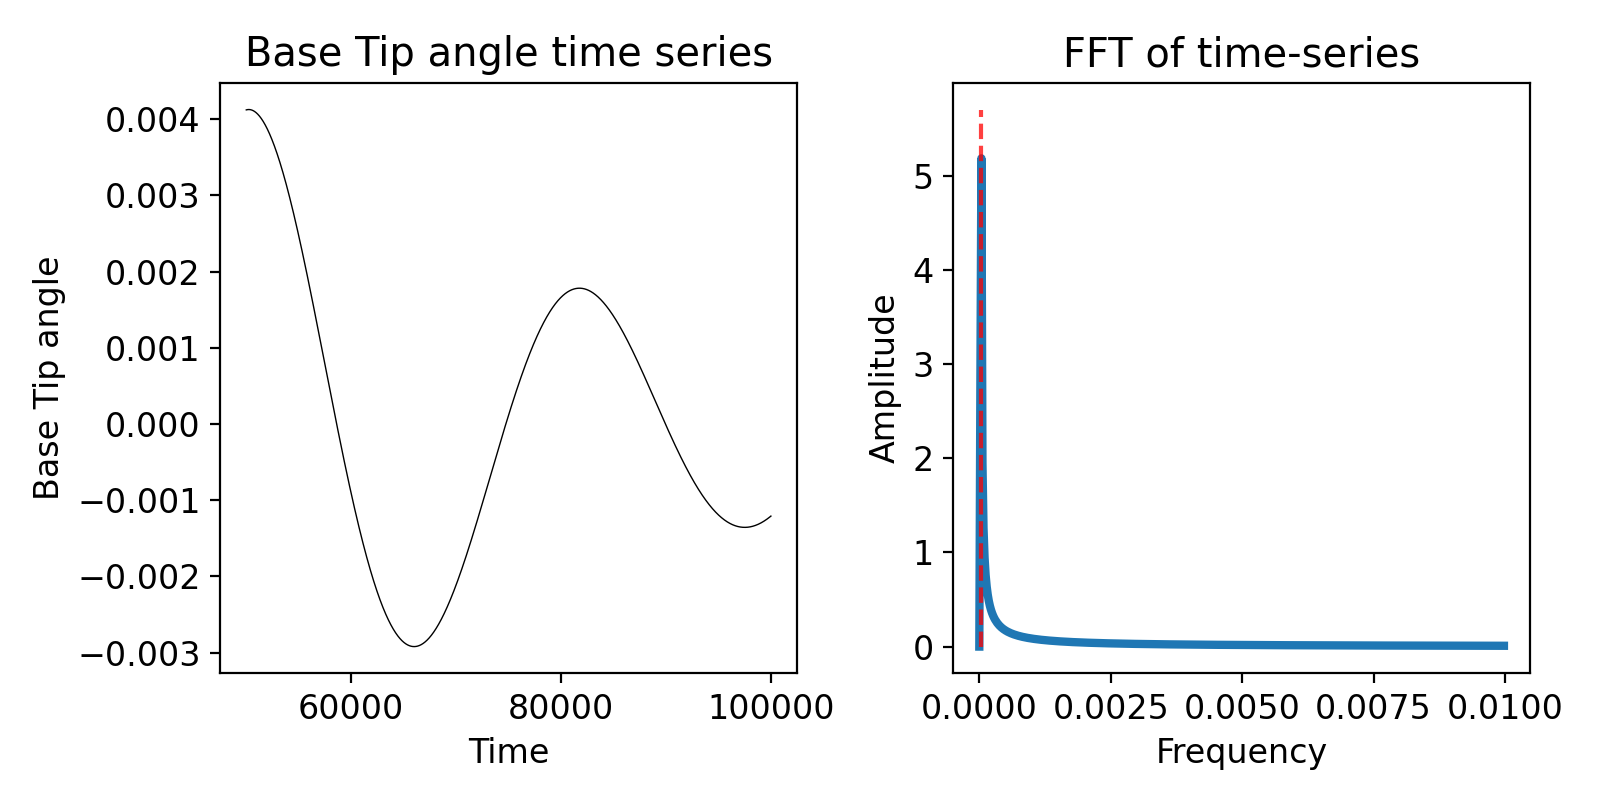

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 10.0
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00026
Activity number: 5.3816
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0003399660067986403 cycles/time
Flapping time: 2941.47055882647


<IPython.core.display.Javascript object>


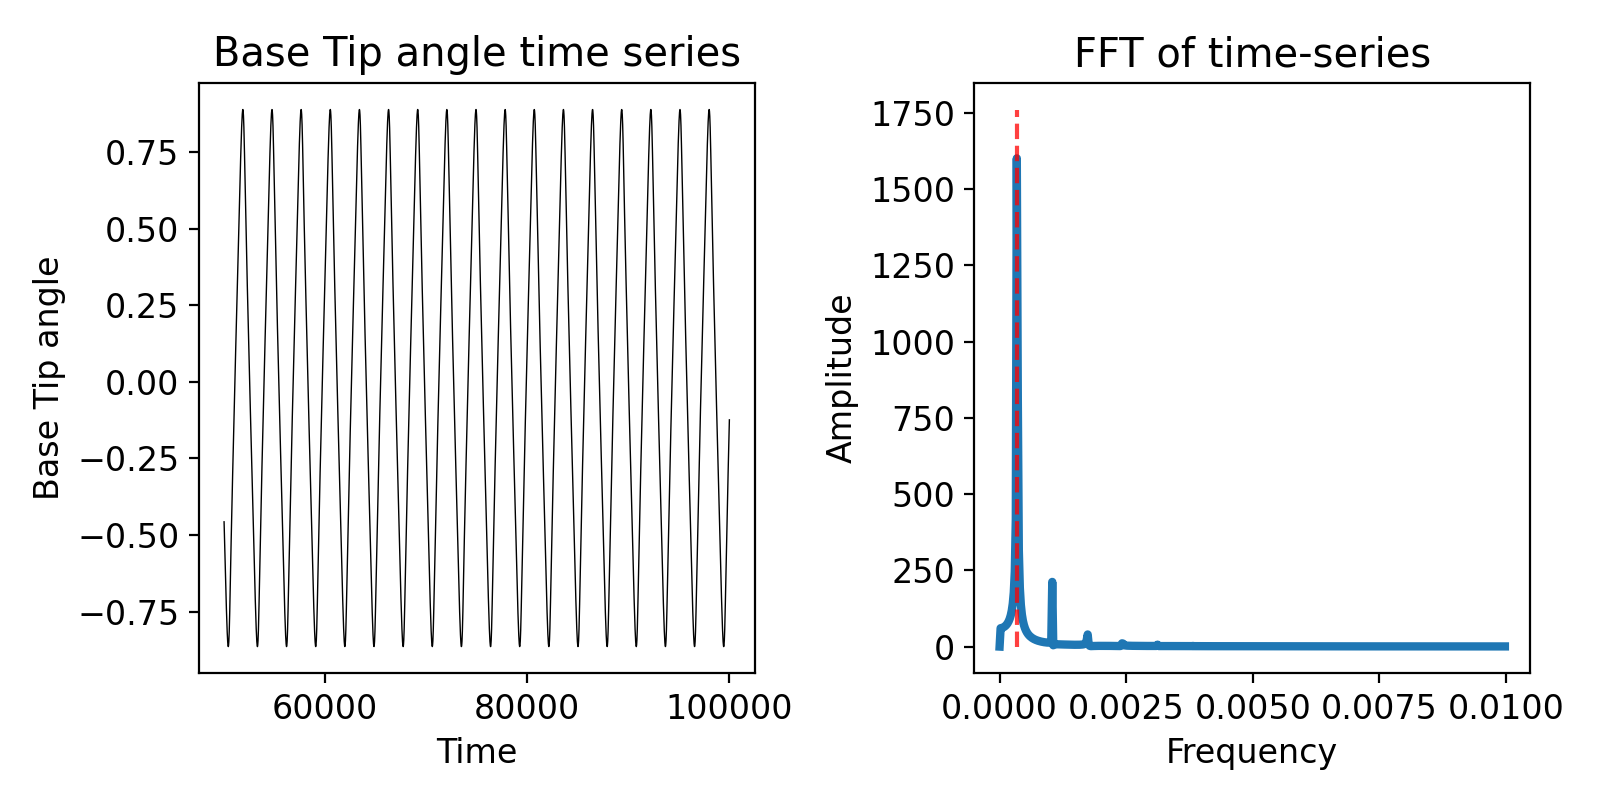

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.5
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00171
Activity number: 35.97175
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0003799620075984803 cycles/time
Flapping time: 2631.8420789499996


<IPython.core.display.Javascript object>


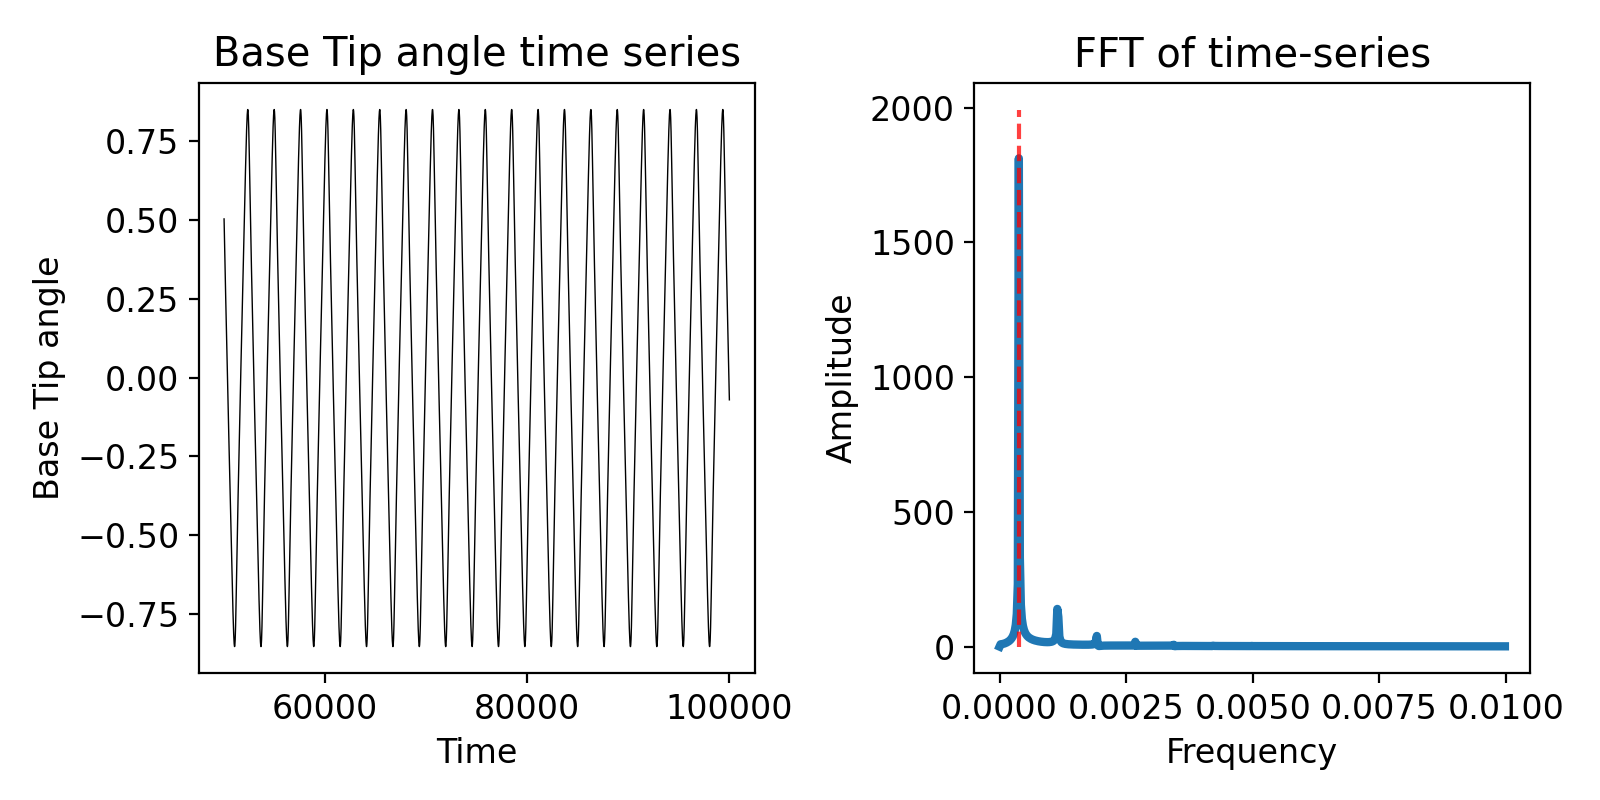

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.4
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00183
Activity number: 38.52093
**************************************************
Time series sample rate: 0.10001
Flapping freq: 0.0004599540091981604 cycles/time
Flapping time: 2174.130413045652


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


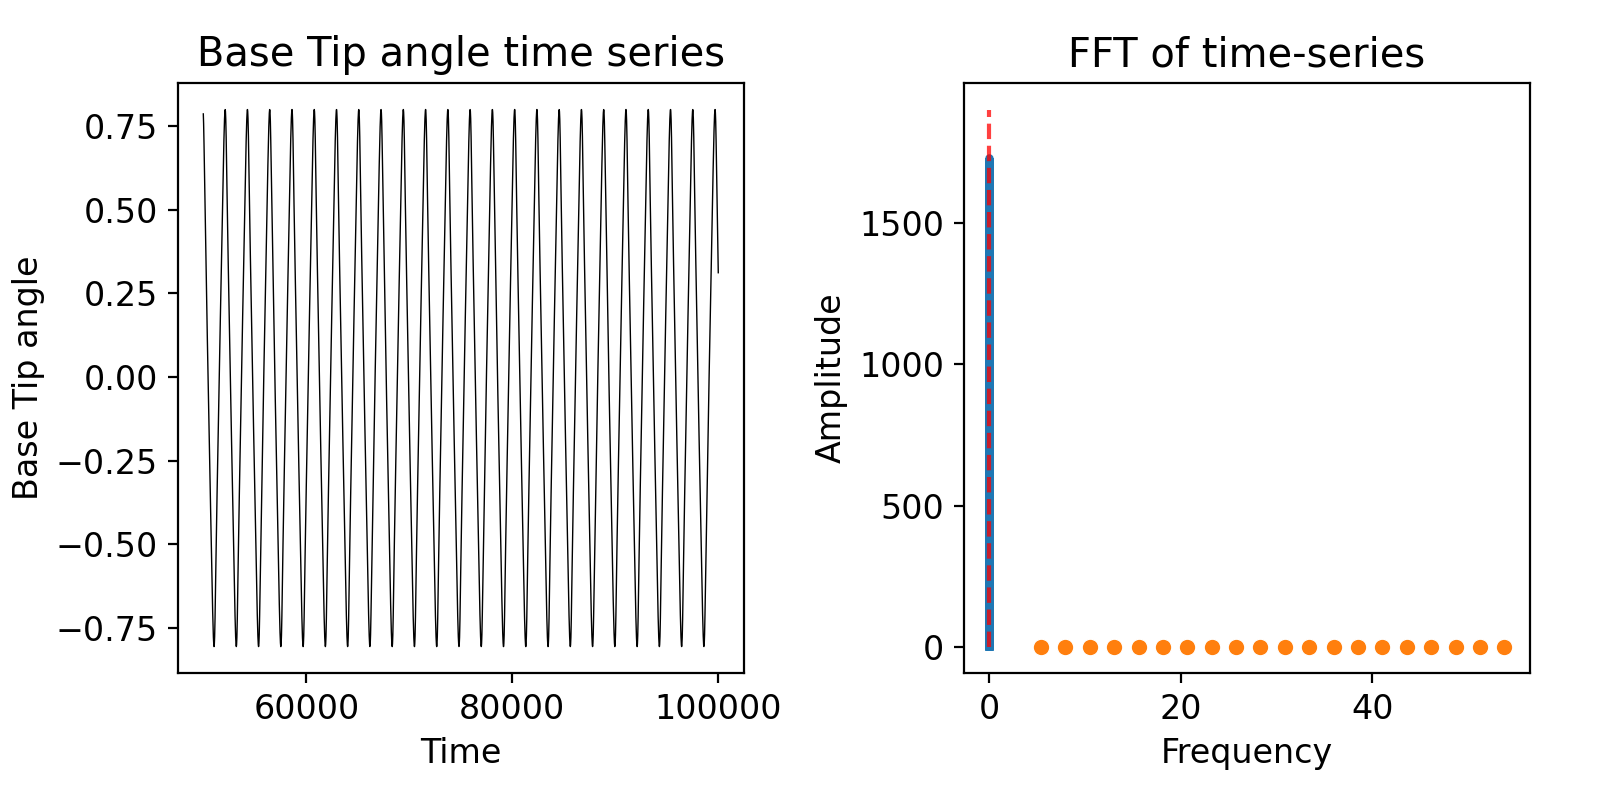

**************************************************
Time-scales
**************************************************
Stretch relzation time: 0.43
Bend relaxation time: 228072.75
Active motility time-scale: 1.23
**************************************************
Dimensionless numbers
**************************************************
Force per unit lenth due to activity: 0.00208
Activity number: 43.61928
**************************************************


In [48]:
data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ConstantCompressiveActivity_sweep/FinalSims'

df_freq = pd.DataFrame({})
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):

    root, subFolderName = os.path.split(dirs)

    for file in files:
        if(file.endswith('hdf5')):
            filament = analysis.analysisTools(file = os.path.join(dirs, file))
            
            freq = compute_filament_freq(filament = filament, plot = True)
            filament.relaxation_time_scales()
            filament.compute_dimensionless_groups()       
            
            df_freq = df_freq.append(pd.DataFrame({'Activity number':[filament.activity_number], 'Frequency':[freq]}))
           
            
               


In [49]:
df_freq

Activity number  Frequency
0        18.127495    0.00014
0        30.873389    0.00028
0        46.168463    0.00050
0        25.775032    0.00022
0        51.266821    0.00062
0        20.676674    0.00016
0         7.930779    0.00004
0        33.422568    0.00032
0        13.029137    0.00008
0        23.225853    0.00020
0        10.479958    0.00006
0        53.816000    0.00068
0        28.324211    0.00024
0        15.578316    0.00012
0        48.717642    0.00056
0        41.070105    0.00042
0         5.381600    0.00004
0        35.971747    0.00034
0        38.520926    0.00038
0        43.619284    0.00046

In [83]:
# Plot Flapping freq vs activity strength
file_path = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Validation'
save = True
power_law_exp = 4/3
C = 0.3*10**-5

predicted_power_law = C*df_freq['Activity number']**power_law_exp


plt.figure(figsize=(4,3))
title = 'FlappingFreq_vs_activityStrength_Validation'
# Predicted power law
plt.plot(df_freq['Activity number'], predicted_power_law, color = 'k')

sns.scatterplot(x = 'Activity number', y = 'Frequency', data = df_freq, color = 'r')



plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
if save:
    plt.savefig(os.path.join(file_path, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(file_path, title+'.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>

In [93]:
# Plot Flapping freq vs activity strength
file_path = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Validation'
save = False

power_law_exp = 4/3
C = 0.3*10**-5

activity_array = np.linspace(min(df_freq['Activity number']), 2*max(df_freq['Activity number']), 20)

predicted_power_law = 1/(C*activity_array**power_law_exp)


plt.figure(figsize=(4,3))
title = 'FlappingTime_vs_activityStrength_Validation_LinearScale'
# Predicted power law
plt.plot(activity_array, predicted_power_law, color = 'k', label ='4/3 power law')

plt.scatter(df_freq['Activity number'], 1/df_freq['Frequency'], color = 'r', label = 'Simulation')


plt.xlabel('Activity number')
plt.ylabel('Flapping time scale')

plt.legend()
plt.xscale('log')
plt.yscale('log')
# plt.xlim([15, 60])
# plt.ylim([100, 10000])
plt.tight_layout()
if save:
    plt.savefig(os.path.join(file_path, title+'.png'), dpi = 300)
    plt.savefig(os.path.join(file_path, title+'.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>